In [1]:
import Plots
import NBodySimulator
import StaticArrays
import HTTP
import CSV

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [4]:
const G = 6.67408e-11 # kg^-1 m^3 s^-2
const t0 = 2458976.500000000 # A.D. 2020-May-07 00:00:00.0000 TDB (units = Earth days)
const au = 1.49597870700e11 # m/au
const day = 86400.0 # s/day
struct pd
    b
    r
end

Sun mass data from https://en.wikipedia.org/wiki/Sun
Planet mass data from https://ssd.jpl.nasa.gov/?planet_phys_par
Position data from https://ssd.jpl.nasa.gov/horizons.cgi#results
* Ephemeris Type: 	VECTORS
* Coordinate Origin: 	Solar System Barycenter (SSB) [500@0]
* Time Span: 	Start=2020-05-07

In [3]:
function pdata(command, mass)
    v = Vector{Float64}(undef,6)
    r = HTTP.request("GET", "https://ssd.jpl.nasa.gov/horizons_batch.cgi?" *
        "batch=1&MAKE_EPHEM='YES'&TABLE_TYPE='VECTORS'&START_TIME='2020-05-07'&" *
        "STOP_TIME='2020-12-30'&STEP_SIZE='30%20d'&CSV_FORMAT='YES'&" *
        "CENTER='@0'&COMMAND='" * command * "'")
    result = String(r.body)
    m = match(r"\$\$SOE\n([^\$]*)\$\$EOE\n", result)
    c = CSV.read(IOBuffer(m[1]), header=["JDTDB", "TDB", "X", "Y", "Z", "VX", "VY", "VZ", "LT", "RG", "RR"])
    for i in 3:8
        v[i-2] = c[1,i]*1000.0 # Convert km to m for first row
    end
    return(pd(NBodySimulator.MassBody(
                StaticArrays.SVector(v[1], v[2], v[3]),
                StaticArrays.SVector(v[4], v[5], v[6]), 
                mass), result))
end
sun = pdata("10", 1988500e24)
mercury = pdata("199", 0.330114e24)
venus = pdata("299", 4.86747e24)
earth = pdata("399", 5.97237e24)
mars = pdata("499", 0.641712e24)
jupiter = pdata("599", 1898.187e24)
saturn = pdata("699", 568.336e24)
uranus = pdata("799", 86.8127e24)
neptune = pdata("899", 102.4126e24)
pluto = pdata("999", 0.013030e24)
const bodies = [ sun.b, mercury.b, venus.b, earth.b, mars.b, jupiter.b, saturn.b, uranus.b, neptune.b, pluto.b ] 

thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 1. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 2. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 3. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 4. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 5. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 6. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 7. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line

thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 1. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 2. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 3. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 4. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 5. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 6. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line on data row: 7. Ignoring any extra columns on this row
thread = 1 warning: parsed expected 11 columns, but didn't reach end of line

10-element Array{NBodySimulator.MassBody{Float64,Float64},1}:
 NBodySimulator.MassBody{Float64,Float64}([-7.24764151699052e8, 1.063504899907968e9, 7.809572856760933e6], [-14.128701581322622, -5.667110973908211, 0.4012336501789666], 1.9885e30)
 NBodySimulator.MassBody{Float64,Float64}([2.433425210900718e10, 4.020043340239679e10, 9.071039244422429e8], [-50744.38936160061, 28219.83112997464, 6960.534151493965], 3.30114e23)
 NBodySimulator.MassBody{Float64,Float64}([-9.51152908270729e10, -5.130010888824722e10, 4.736254851627968e9], [16731.29471498851, -30792.27489267942, -1388.378419163475], 4.86747e24)
 NBodySimulator.MassBody{Float64,Float64}([-1.0438988895007619e11, -1.086631485981335e11, 1.28286561544165e7], [21145.14991794887, -20564.67414180139, 2.062231176508611], 5.97237e24)
 NBodySimulator.MassBody{Float64,Float64}([4.159306599796097e10, -2.0903353631720438e11, -5.43267249890627e9], [24654.08425561382, 6861.546285287316, -460.89497792611], 6.41712e23)
 NBodySimulator.MassBody{Floa

In [42]:
const timespan = (0.0, 3000.0*day)

system = NBodySimulator.GravitationalSystem(bodies, G)
simulation = NBodySimulator.NBodySimulation(system, timespan)
simresult = NBodySimulator.run_simulation(simulation)

N: 10
Timespan: (0.0, 3.0e8)
Boundary conditions: NBodySimulator.InfiniteBox{Float64}([-Inf, Inf, -Inf, Inf, -Inf, Inf])
Potentials: 
Gravitational:
	G:6.67408e-11
Time steps: 817
t: 0.0, 3.0e8


┌ Info: Saved animation to 
│   fn = /Users/jason/workspace/space-simulator/tmp.gif
└ @ Plots /Users/jason/.julia/packages/Plots/cc8wh/src/animation.jl:98


Plots.AnimatedGif("/Users/jason/workspace/space-simulator/tmp.gif")
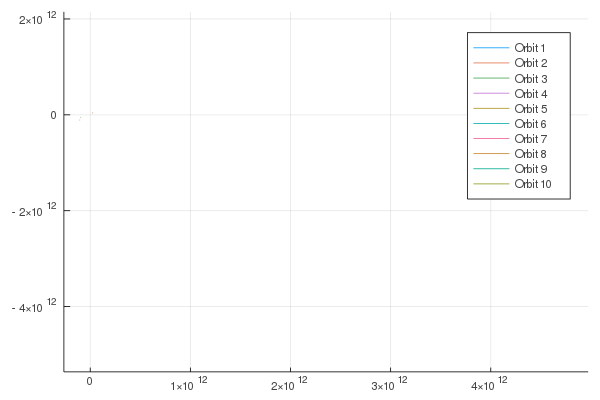

In [6]:
Plots.animate(simresult)

In [32]:
n = length(bodies)
plt = Plots.plot3d(
    n,
    xlim = (-60*au, 60*au),
    ylim = (-60*au, 60*au),
    zlim = (-60*au, 60*au),
    title = "Orbit",
    marker = :circle,
    #linetype = :scatter3d
)

@Plots.gif for i=1:3000
    r = NBodySimulator.get_position(simresult, i)
    #println(rotl90(r)[1:n], rotl90(r)[n+1:2*n], rotl90(r)[2*n+1:3*n])
    push!(plt, rotl90(r)[1:n], rotl90(r)[n+1:2*n], rotl90(r)[2*n+1:3*n])
end every 10

InterruptException: InterruptException:

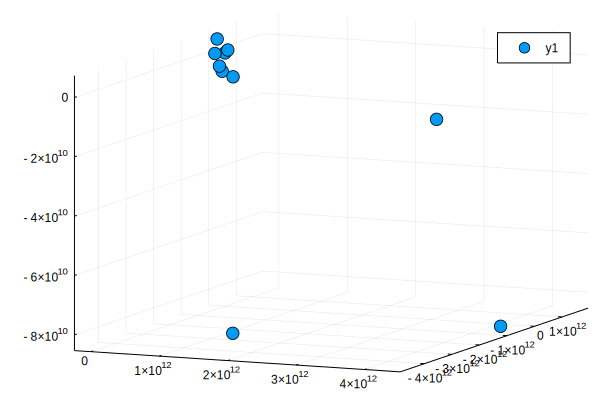

In [7]:
n = length(bodies)
for i=1:30:300
    r = NBodySimulator.get_position(simresult, i)
end
r = NBodySimulator.get_position(simresult, 0)
Plots.plot(r[1,:], r[2,:], r[3,:], seriestype=:scatter, markersize = 7)

In [10]:
println(earth.r)

*******************************************************************************
 Revised: July 31, 2013                  Earth                              399
 
 GEOPHYSICAL PROPERTIES (revised Aug 15, 2018):
  Vol. Mean Radius (km)    = 6371.01+-0.02   Mass x10^24 (kg)= 5.97219+-0.0006
  Equ. radius, km          = 6378.137        Mass layers:
  Polar axis, km           = 6356.752          Atmos         = 5.1   x 10^18 kg
  Flattening               = 1/298.257223563   oceans        = 1.4   x 10^21 kg
  Density, g/cm^3          = 5.51              crust         = 2.6   x 10^22 kg
  J2 (IERS 2010)           = 0.00108262545     mantle        = 4.043 x 10^24 kg
  g_p, m/s^2  (polar)      = 9.8321863685      outer core    = 1.835 x 10^24 kg
  g_e, m/s^2  (equatorial) = 9.7803267715      inner core    = 9.675 x 10^22 kg
  g_o, m/s^2               = 9.82022         Fluid core rad  = 3480 km
  GM, km^3/s^2             = 398600.435436   Inner core rad  = 1215 km
  GM 1-sigma, km^3/s^2     =   

Array{Float64}((10, 3)) [1.997066918166823e12 -4.681409571358568e12 -7.673288605578279e10; 4.3859835813554297e12 -8.926896943684296e11 -8.269605193965215e10; … ; 2.433425210900718e10 4.020043340239679e10 9.071039244422429e8; -7.24764151699052e8 1.063504899907968e9 7.809572856760933e6]
Array{Float64}((10,)) [1.997066918166823e12, 4.3859835813554297e12, 2.382510930024673e12, 6.583085062472236e11, 2.1692293705456952e11, 4.159306599796097e10, -1.0438988895007619e11, -9.51152908270729e10, 2.433425210900718e10, -7.24764151699052e8]


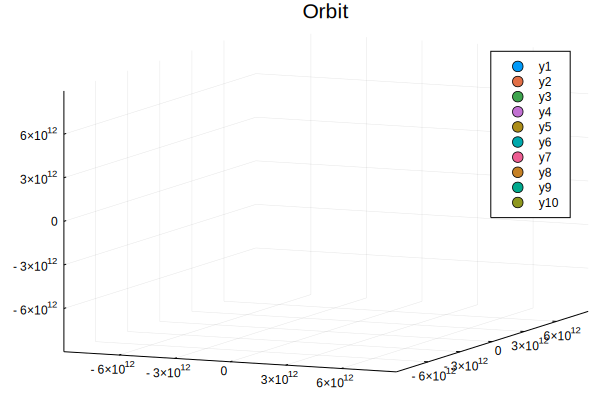

In [31]:
n = length(bodies)
r = rotl90(NBodySimulator.get_position(simresult, 0))
dump(r)
dump(r[:,1])
Plots.plot3d(
    n,
    xlim = (-60*au, 60*au),
    ylim = (-60*au, 60*au),
    zlim = (-60*au, 60*au),
    title = "Orbit",
    marker = :circle,
    #markersize = 1e12,
    x = r[:,1], 
    y = r[:,2], 
    z = r[:,3],
    #linetype = :scatter3d
)


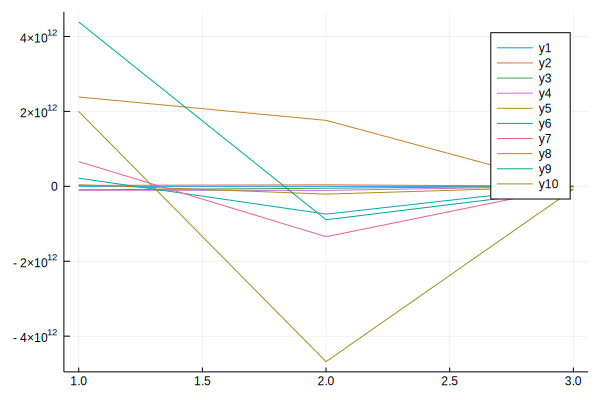

In [28]:
Plots.plot(NBodySimulator.get_position(simresult, 0))

In [ ]:
n = length(bodies)
plt = Plots.plot3d(
    n,
    xlim = (-60*au, 60*au),
    ylim = (-60*au, 60*au),
    zlim = (-60*au, 60*au),
    title = "Orbit",
    marker = :circle,
    #linetype = :scatter3d
)

anim = Plots.@animate for i=1:day:3000*day
    r = NBodySimulator.get_position(simresult, i)
    push!(plt, rotl90(r)[1:n], rotl90(r)[n+1:2*n], rotl90(r)[2*n+1:3*n])
end
Plots.gif(anim, "anim_fps30.gif", fps = 30)